Lab | Cross Validation
For this lab, we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

Instructions
1. Apply SMOTE for upsampling the data

Use logistic regression to fit the model and compute the accuracy of the model.
Use decision tree classifier to fit the model and compute the accuracy of the model.
Compare the accuracies of the two models.

2. Apply TomekLinks for downsampling

It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
Use logistic regression to fit the model and compute the accuracy of the model.
Use decision tree classifier to fit the model and compute the accuracy of the model.
Compare the accuracies of the two models.
You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import TomekLinks
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv(r"C:\Users\anasa\Desktop\Ana\IRONHACK\Labs\Python ll\Lab Cross Validation\Customer-Churn.csv")

In [2]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": 0})
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
columnas = df.columns.tolist()

In [7]:
for col in columnas:
    valores_unicos = df[col].unique()
    print(f"Valores únicos en la columna '{col}': {valores_unicos}")

Valores únicos en la columna 'gender': ['Female' 'Male']
Valores únicos en la columna 'SeniorCitizen': [0 1]
Valores únicos en la columna 'Partner': ['Yes' 'No']
Valores únicos en la columna 'Dependents': ['No' 'Yes']
Valores únicos en la columna 'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Valores únicos en la columna 'PhoneService': ['No' 'Yes']
Valores únicos en la columna 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'OnlineBackup': ['Yes' 'No' 'No internet service']
Valores únicos en la columna 'DeviceProtection': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'TechSupport': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'StreamingTV': ['No' 'Yes' 'No internet service']
Valores únicos en la columna 'StreamingMovies': ['No' 'Ye

In [8]:
import numpy as np
numericals = df.select_dtypes(include=['int', 'float'])
categoricals = df.select_dtypes(exclude=['int', 'float'])

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categoricals.columns.tolist():
     categoricals[f'encoded_{column}'] = label_encoder.fit_transform(categoricals[column])  

In [10]:
categoricals.dtypes

gender                      object
Partner                     object
Dependents                  object
PhoneService                object
OnlineSecurity              object
OnlineBackup                object
DeviceProtection            object
TechSupport                 object
StreamingTV                 object
StreamingMovies             object
Contract                    object
Churn                       object
encoded_gender               int32
encoded_Partner              int32
encoded_Dependents           int32
encoded_PhoneService         int32
encoded_OnlineSecurity       int32
encoded_OnlineBackup         int32
encoded_DeviceProtection     int32
encoded_TechSupport          int32
encoded_StreamingTV          int32
encoded_StreamingMovies      int32
encoded_Contract             int32
encoded_Churn                int32
dtype: object

In [11]:
categoricals.columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'Churn',
 'encoded_gender',
 'encoded_Partner',
 'encoded_Dependents',
 'encoded_PhoneService',
 'encoded_OnlineSecurity',
 'encoded_OnlineBackup',
 'encoded_DeviceProtection',
 'encoded_TechSupport',
 'encoded_StreamingTV',
 'encoded_StreamingMovies',
 'encoded_Contract',
 'encoded_Churn']

In [12]:
categoricals1 = categoricals.drop(columns=[
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'Churn'
])

In [13]:
df_cod = pd.concat([categoricals1, numericals], axis=1)
df_cod

,encoded_gender,encoded_Partner,encoded_Dependents,encoded_PhoneService,encoded_OnlineSecurity,encoded_OnlineBackup,encoded_DeviceProtection,encoded_TechSupport,encoded_StreamingTV,encoded_StreamingMovies,encoded_Contract,encoded_Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,0,2,0,0,0,0,0,0,0,1,29.85,29.85
1,1,0,0,1,2,0,2,0,0,0,1,0,0,34,56.95,1889.50
2,1,0,0,1,2,2,0,0,0,0,0,1,0,2,53.85,108.15
3,1,0,0,0,2,0,2,2,0,0,1,0,0,45,42.30,1840.75
4,0,0,0,1,0,0,0,0,0,0,0,1,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,2,2,2,1,0,0,24,84.80,1990.50
7039,0,1,1,1,0,2,2,0,2,2,1,0,0,72,103.20,7362.90
7040,0,1,1,0,2,0,0,0,0,0,0,0,0,11,29.60,346.45
7041,1,1,0,1,0,0,0,0,0,0,0,1,1,4,74.40,306.60


In [14]:
# Analisis de multicolinearidad/datos redundantes:

        
# Matriz de correlación:
correl_matrix=numericals.corr()
correl_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


In [15]:

# Modelizamos sin tener en cuenta que existe data imbalance:
X0 = df_cod.drop(columns=['encoded_Churn'])
y0 = df_cod['encoded_Churn']

X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.2, random_state=42)
# Inicializar el modelo de Regresión Logística
model0 = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model0.fit(X_train0, y_train0)

c:\Users\anasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [17]:
# Podemos ahora valorar la precisón del modleo creado:
# Predecir los valores para el conjunto de prueba
y_pred0 = model0.predict(X_test0)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test0, y_pred0)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.26%


In [18]:
#model1 = DecisionTreeClassifier(random_state=42)
#model1.fit(X_resampled, y_resampled)

In [19]:

# Definir las variables independientes (X) y la variable objetivo (y)
X = df_cod.drop(columns=['encoded_Churn'])
y = df_cod['encoded_Churn']

# Dividir los datos en entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar el balance de clases después de aplicar SMOTE
print("Distribución de clases antes de SMOTE:")
print(y_train.value_counts())

print("Distribución de clases después de SMOTE:")
print(y_train_smote.value_counts())

Distribución de clases antes de SMOTE:
encoded_Churn
0    4138
1    1496
Name: count, dtype: int64
Distribución de clases después de SMOTE:
encoded_Churn
0    4138
1    4138
Name: count, dtype: int64


In [20]:

# Inicializar el modelo de Regresión Logística
model1 = LogisticRegression(max_iter=1000)

# Entrenar el modelo
model1.fit(X_train, y_train)

c:\Users\anasa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 81.26%


In [23]:
X1 = df_cod.drop(columns=['encoded_Churn'])
y1 = df_cod['encoded_Churn']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
tomek_links = TomekLinks()
X_resampled, y_resampled = tomek_links.fit_resample(X_train1, y_train1)

# Mostrar los resultados después de aplicar Tomek Links
print("Tamaño original de X_train:", X_train1.shape)
print("Tamaño después de aplicar Tomek Links:", X_resampled.shape)


# Verificar el balance de clases después de aplicar Tomek Links:
print("Distribución de clases antes de Tomek Links:")
print(y_train1.value_counts())

print("Distribución de clases después de Tomek Links:")
print(y_resampled.value_counts())

Tamaño original de X_train: (5634, 15)
Tamaño después de aplicar Tomek Links: (5163, 15)
Distribución de clases antes de Tomek Links:
encoded_Churn
0    4138
1    1496
Name: count, dtype: int64
Distribución de clases después de Tomek Links:
encoded_Churn
0    3667
1    1496
Name: count, dtype: int64


In [24]:

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_resampled, y_resampled)

DecisionTreeClassifier(random_state=42)

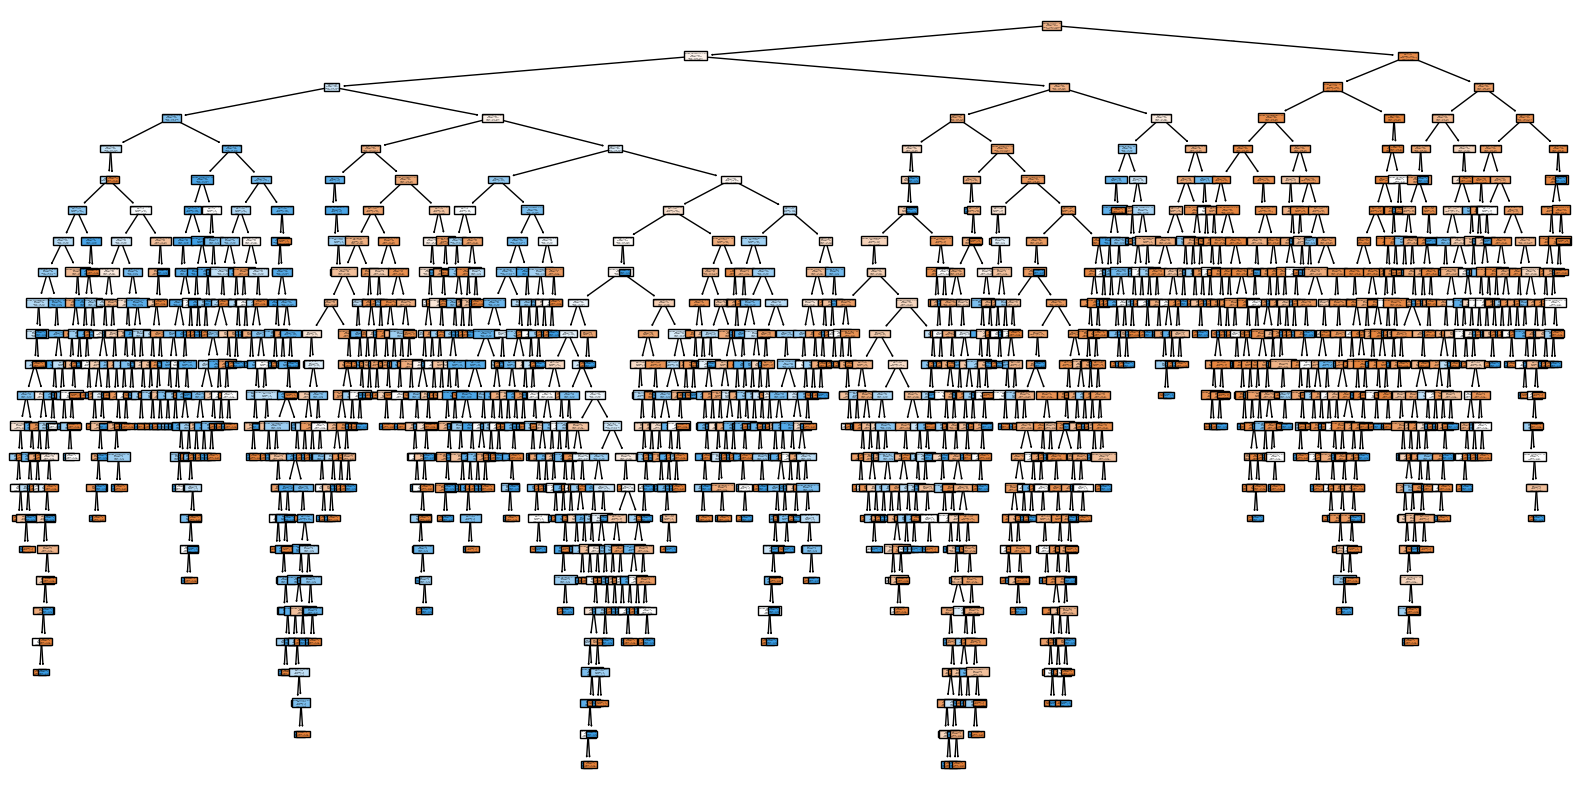

In [29]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Dibujo del árbol de decisión
plt.figure(figsize=(20,10))  # Ajustar el tamaño de la figura
plot_tree(model2, feature_names=X1.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.show()